Random forest

In [1]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.datasets import load_iris

# Step 2: Load the Iris Dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target

# Step 3: Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create a Random Forest Model with Default Parameters
rf_model = RandomForestClassifier(random_state=42)

# Step 5: Train the Model
rf_model.fit(X_train, y_train)

# Step 6: Make Predictions on the Test Set
y_pred = rf_model.predict(X_test)

# Step 7: Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')  # Use weighted average for multiclass classification
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)

# Step 8: Experiment by Adjusting Hyperparameters
# You can experiment with hyperparameters of the RandomForestClassifier here.


Accuracy: 1.0
Recall: 1.0
F1 Score: 1.0


In [3]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Associate feature importances with feature names
feature_names = data.feature_names

# Create a dictionary to map feature names to their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features by importance (in descending order)
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the most pertinent parameters
print("Feature Importances:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")

Feature Importances:
petal length (cm): 0.43999397414456937
petal width (cm): 0.4215215887397244
sepal length (cm): 0.10809762464246378
sepal width (cm): 0.030386812473242528


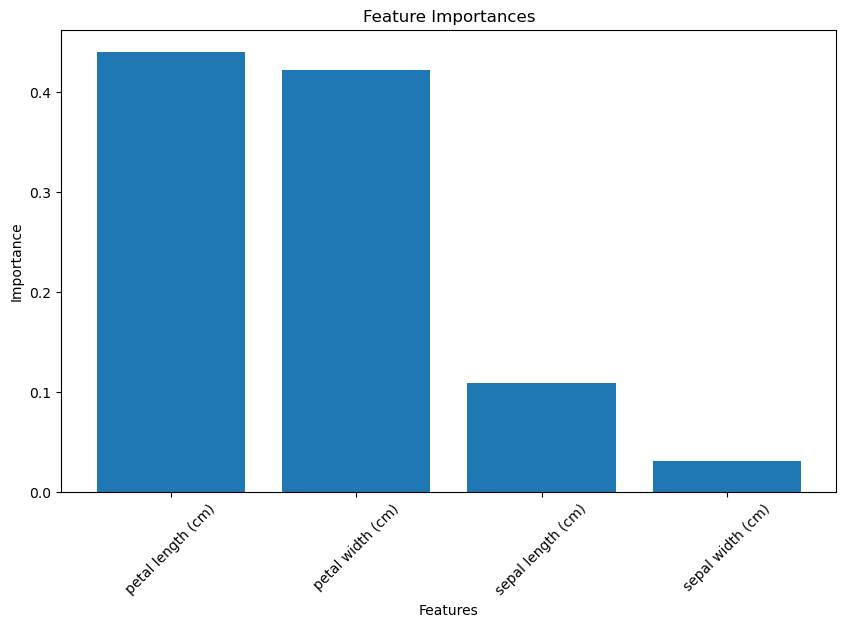

In [5]:
import matplotlib.pyplot as plt
# Create bar graph for feature importances
features, importances = zip(*sorted_feature_importance)
plt.figure(figsize=(10, 6))
plt.bar(features, importances)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.xticks(rotation=45)
plt.show()

In [2]:
from sklearn.model_selection import GridSearchCV

# Define a range of hyperparameters to search
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],    # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum samples required at each leaf node
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

# Create a Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(random_state=42, **best_params)

# Train the model with the best hyperparameters
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the model with the best hyperparameters
accuracy_best = accuracy_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

print("Best Model - Accuracy:", accuracy_best)
print("Best Model - Recall:", recall_best)
print("Best Model - F1 Score:", f1_best)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Model - Accuracy: 1.0
Best Model - Recall: 1.0
Best Model - F1 Score: 1.0
